In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

print("✅ 工具包导入成功！")

df = pd.read_excel('Online Retail.xlsx')

print("📊 数据读取成功！")
print(f"数据形状：{df.shape[0]} 行 × {df.shape[1]} 列")

df.head()

✅ 工具包导入成功！
📊 数据读取成功！
数据形状：525461 行 × 8 列


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
print("数据基本信息:")
print(df.info())

print("\n 数据列统计:")
print(df.describe())

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None

 数据列统计:
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%   

In [4]:
df_clean = df.copy()

print("🧹 数据清洗过程：")
print(f"原始数据：{len(df_clean):,} 行")

# 1. 删除CustomerID为空的行
df_clean = df_clean.dropna(subset=['Customer ID'])
print(f"删除CustomerID为空后：{len(df_clean):,} 行")

# 2. 删除无效交易
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['Price'] > 0]
print(f"删除无效交易后：{len(df_clean):,} 行")

# 3. 创建总销售额列
df_clean['TotalSales'] = df_clean['Quantity'] * df_clean['Price']

# 4. 转换日期格式
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

print("✅ 清洗完成！")

🧹 数据清洗过程：
原始数据：525,461 行
删除CustomerID为空后：417,534 行
删除无效交易后：407,664 行
✅ 清洗完成！


In [5]:
 print("📈 基础业务指标：")
print(f"💰 总销售额：£{df_clean['TotalSales'].sum():,.2f}")
print(f"🛒 总交易次数：{df_clean['Invoice'].nunique():,}")
print(f"👥 总客户数：{df_clean['Customer ID'].nunique():,}")
print(f"📦 商品种类：{df_clean['Description'].nunique():,}")

📈 基础业务指标：
💰 总销售额：£8,832,003.27
🛒 总交易次数：19,213
👥 总客户数：4,312
📦 商品种类：4,444


当前已定义的变量:
True


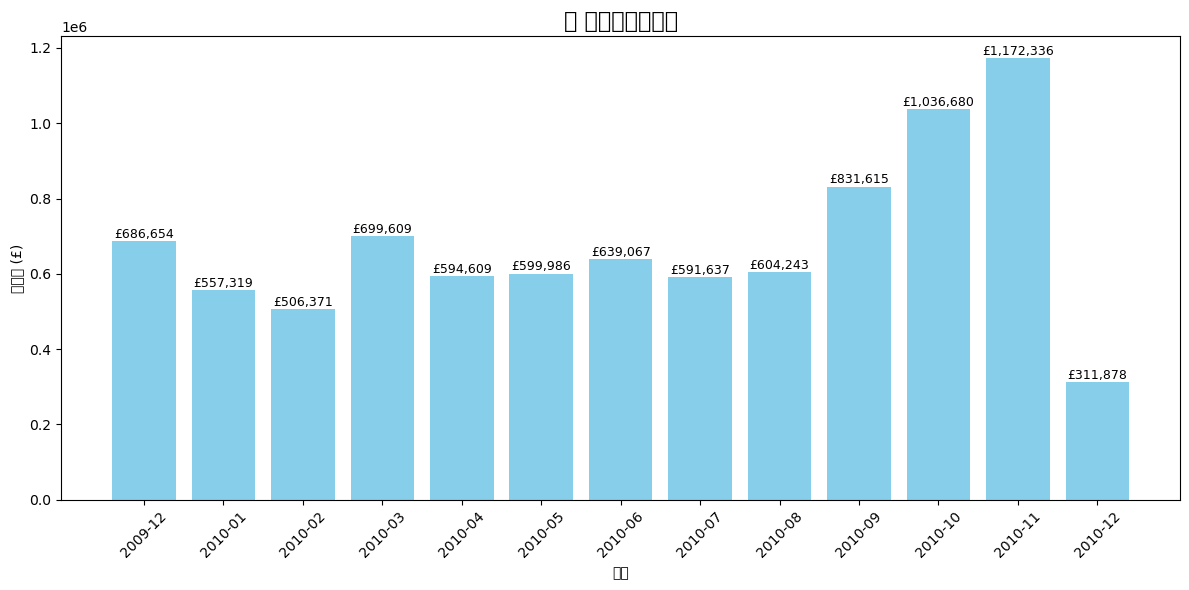

In [6]:
print("当前已定义的变量:")
print("df_clean" in dir())
# 1. 月度销售趋势
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.strftime('%Y-%m')
monthly_sales = df_clean.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.title('📈 月度销售额趋势', fontsize=16)
plt.xlabel('月份')
plt.ylabel('销售额 (£)')
plt.xticks(rotation=45)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f'£{height:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


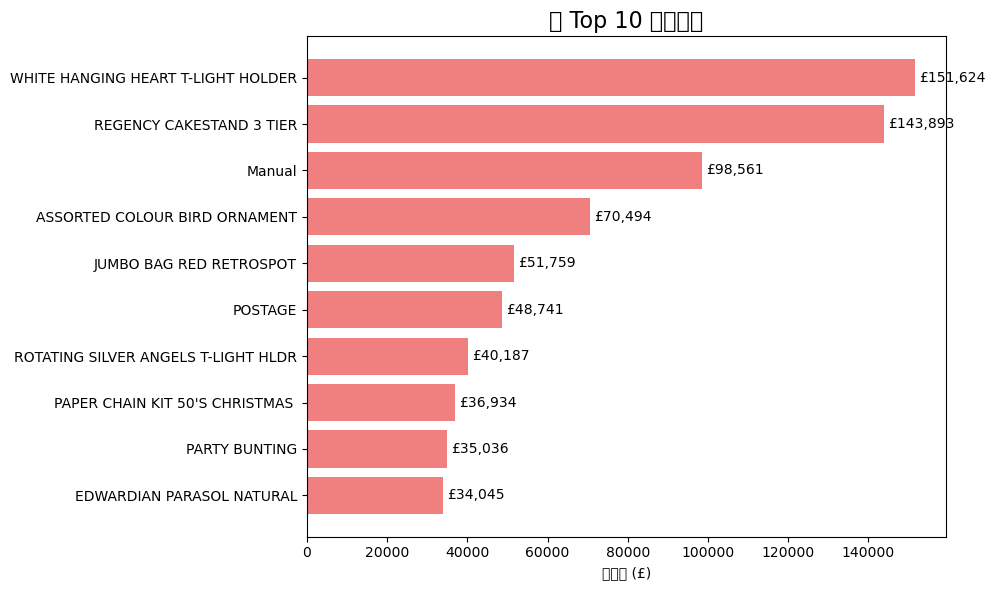

In [7]:
top_products = df_clean.groupby('Description')['TotalSales'].sum()
top_products = top_products.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_products.index, top_products.values, color='lightcoral')
plt.title('🏆 Top 10 畅销商品', fontsize=16)
plt.xlabel('销售额 (£)')
plt.gca().invert_yaxis()  # 最高的在最上面

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2,
             f'£{width:,.0f}', va='center')

plt.tight_layout()
plt.show()


In [8]:
df_clean.to_csv(r'D:\table\A戴师兄数据分析\SQL\Online DataAnalysis\outputs\cleaned_data.csv', index=False)
print("💾 清洗后的数据已保存为：cleaned_data.csv")
print("🎉 分析完成！")

💾 清洗后的数据已保存为：cleaned_data.csv
🎉 分析完成！
